# Water Quality
1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. 

2. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter.

3. Temperature:
The temperature greater than 25 degree is undesirable and above 30 degree is unfit for public water supply.

3. Conductivity:
Pure water is not a good conductor of electric current rather a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. 

5. Label:
Indicates if water is safe for human consumption where 1 means Potable(drinkable) and 0 means Not potable(not drinkable).

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [28]:
df = pd.read_csv('../src/data/water_quality.csv')

In [29]:
df.head()

,Ph,Turbidity,Temperature,Conductivity,Label
0,7.01,706.101031,20.529632,342.543917,1
1,7.25,721.232354,25.355915,325.120790,1
2,6.88,596.178640,29.599519,365.238751,1
3,7.89,674.121989,11.838675,259.524332,1
4,8.21,505.266735,14.167877,298.184947,1


Feature Engineering: Hardness and Turbidity-Conductivity Ratio
To improve the classification of water potability, two new features were engineered based on the relationships between existing features:

In [30]:
df['Hardness'] = df['Ph'] * df['Conductivity']
df['Turbidity_Conductivity_Ratio'] = df['Turbidity'] / df['Conductivity']
df.head()

,Ph,Turbidity,Temperature,Conductivity,Label,Hardness,Turbidity_Conductivity_Ratio
0,7.01,706.101031,20.529632,342.543917,1,2401.232860,2.061345
1,7.25,721.232354,25.355915,325.120790,1,2357.125725,2.218352
2,6.88,596.178640,29.599519,365.238751,1,2512.842610,1.632298
3,7.89,674.121989,11.838675,259.524332,1,2047.646983,2.597529
4,8.21,505.266735,14.167877,298.184947,1,2448.098413,1.694474


In [31]:
df.shape

(8499, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ph                            8499 non-null   float64
 1   Turbidity                     8499 non-null   float64
 2   Temperature                   8499 non-null   float64
 3   Conductivity                  8499 non-null   float64
 4   Label                         8499 non-null   int64  
 5   Hardness                      8499 non-null   float64
 6   Turbidity_Conductivity_Ratio  8499 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 464.9 KB


In [33]:
df.describe()

,Ph,Turbidity,Temperature,Conductivity,Label,Hardness,Turbidity_Conductivity_Ratio
count,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000
mean,7.271226,1061.953600,22.738621,415.481822,0.470526,2985.883118,11.874657
std,2.968184,805.811686,11.542392,228.163911,0.499160,2273.157066,287.654289
min,0.000000,0.209485,0.003738,0.086002,0.000000,0.000000,0.000510
25%,6.540000,486.197360,14.342271,281.619251,0.000000,1897.529445,1.365330
50%,7.480000,740.220689,21.584659,350.916497,0.000000,2453.580339,2.089407
75%,8.360000,1615.707545,28.726551,519.786755,1.000000,3152.644534,3.362463
max,13.990000,2998.784108,49.985722,999.498656,1.000000,13580.736242,20579.016479


In [34]:
df['Label'].value_counts()

Label
0    4500
1    3999
Name: count, dtype: int64

### check if there are any null values

In [35]:
print(df.isnull().sum())

Ph                              0
Turbidity                       0
Temperature                     0
Conductivity                    0
Label                           0
Hardness                        0
Turbidity_Conductivity_Ratio    0
dtype: int64


### check the correlation of the features with each other

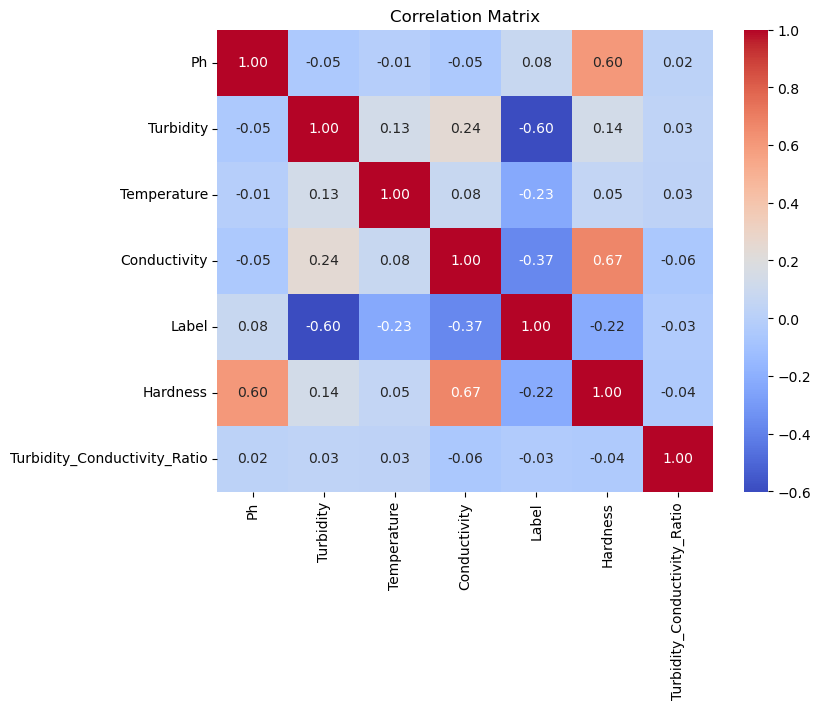

In [36]:
# Correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### save the preprocessed dataset

In [37]:
df.to_csv('../src/cleaned_data/cleaned_data.csv', index=False)